# Задание №1

Для реализованной модели градиентного бустинга постройте графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделайте выводы о зависимости ошибки от этих параметров.

In [28]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [29]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

Разделим выборку на обучающую и тестовую в соотношении 75/25.

In [30]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

Напишем функцию, реализующую предсказание в градиентном бустинге.

In [31]:
def gb_predict(X, trees_list, eta):
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )
    return predictions

В качестве функционала ошибки будем использовать среднеквадратичную ошибку.

In [32]:
def mse(y, y_pred):
    return (sum((y - y_pred) ** 2)) / len(y)

Используем  𝐿2
  loss  𝐿(𝑦,𝑧)=(𝑦−𝑧)2,
  ее производная по  𝑧
  примет вид  𝐿′(𝑦,𝑧)=2(𝑧−𝑦)
 . Реализуем ее также в виде функции (коэффициент 2 можно отбросить).

In [33]:
def residual(y, z):
    return -(z - y)

Реализуем функцию обучения градиентного бустинга.

In [34]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            tree.fit(X_train, y_train)
            
            train_errors.append(mse(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mse(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mse(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mse(y_test, gb_predict(X_test, trees, eta)))
            
        trees.append(tree)
        
    return trees, train_errors, test_errors

Теперь обучим несколько моделей с разными параметрами и исследуем их поведение.

In [228]:
# Число деревьев в ансамбле
n_trees = 50

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

In [229]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mse(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mse(y_test, test_prediction)}')

In [230]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 1423.074778177434
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 2904.1347623632423


Построим графики зависимости ошибки на обучающей и тестовой выборках от количества деревьев в ансамбле.

In [231]:
def get_error_plot_by_n_trees(n_trees, train_err, test_err):
    plt.xlabel('n_trees')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

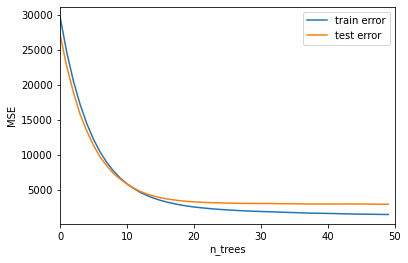

In [232]:
get_error_plot_by_n_trees(n_trees, train_errors, test_errors)

Построим графики зависимости ошибки на обучающей и тестовой выборках от максимальной глубины деревьев.

In [165]:
def get_error_plot_by_max_depth(max_depth, train_err, test_err):
    plt.xlabel('max_depth')
    plt.ylabel('MSE')
    plt.xlim(0, max_depth)
    plt.plot(list(range(max_depth)), train_err, label='train error')
    plt.plot(list(range(max_depth)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [196]:
%%time
# Число деревьев в ансамбле
n_trees = 50

# Шаг
eta = 0.1

# Максимальная глубина деревьев
max_depth = 50

errors_train = []
errors_test = []

for i in range(max_depth):
    i += 1
    trees, train_errors, test_errors = gb_fit(n_trees, i, X_train, X_test, y_train, y_test, eta)
    errors_train.append(train_errors[-1])
    errors_test.append(test_errors[-1])

CPU times: user 21min 53s, sys: 3.01 s, total: 21min 56s
Wall time: 21min 57s


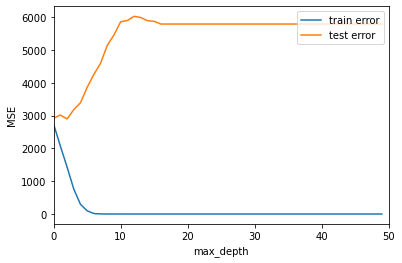

In [197]:
get_error_plot_by_max_depth(50, errors_train, errors_test)

Вывод: при увеличении количества деревьев в ансамбле ошибка падает, так как каждое новое дерево обучается на ошибках предыдущего. При увеличении глубины дерева наблюдаются явные признаки переобучения, потому что модель идеально подстраивается под тренировочные данные, но не может ничего предсказать на тестовых. 

# Задание №2

Модифицируйте реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки примите равным 0.5. Сравните на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [240]:
def sgb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    # Подвыборка
    size = len(X_train) // 2
    train_inds = np.random.randint(X_train.shape[0], size=size)
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            tree.fit(X_train[train_inds], y_train[train_inds])
            
            train_errors.append(mse(y_train[train_inds], gb_predict(X_train[train_inds], trees, eta)))
            test_errors.append(mse(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train[train_inds], trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train[train_inds], residual(y_train[train_inds], target))
            
            train_errors.append(mse(y_train[train_inds], gb_predict(X_train[train_inds], trees, eta)))
            test_errors.append(mse(y_test, gb_predict(X_test, trees, eta)))
            
        trees.append(tree)
        
    return trees, train_errors, test_errors

In [241]:
# Число деревьев в ансамбле
n_trees = 50

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.1

trees_1, train_errors_1, test_errors_1 = sgb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

In [242]:
evaluate_alg(X_train, X_test, y_train, y_test, trees_1, eta)

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 2790.7521767394874
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3833.807264448109


In [243]:
def get_error_plot_by_n_trees(n_trees, train_err, test_err):
    plt.xlabel('n_trees')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='test error GB')
    plt.plot(list(range(n_trees)), test_err, label='test error SGB')
    plt.legend(loc='upper right')
    plt.show()

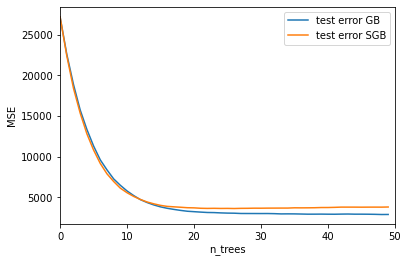

In [244]:
get_error_plot_by_n_trees(n_trees, test_errors, test_errors_1)